In [9]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import math
import re
import copy
import os
import itertools
import math
import matplotlib.image as mpimg
from matplotlib.image import BboxImage
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib.transforms import TransformedBbox,Bbox
from matplotlib.legend_handler import HandlerBase
from matplotlib.patches import Polygon
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import host_subplot
import os

In [10]:
sdgs=pd.read_csv('sdgs1.csv')

In [11]:
ynames=[]
for i in list(range(1,18,1)):
    ynames.append(f'SDG {i}')
SDG_num=len(ynames)

ymins30, ymaxs30 =[85,85,75,85,72,80,75,60,55,60,75,45,45,40,32,75,50],[95,95,85,90,80,90,85,70,67.5,65,95,70,75,45,36,85,60]
ymins50, ymaxs50=[85,85,80,90,75,90,80,60,60,64,75,40,40,47.5,30,80,40],[100,97.5,90,100,82.5,97.5,100,70,75,68,100,90,100,55,45,85,60]
ymins60, ymaxs60=[87.5,85,80,95,77.5,87.5,80,65,62.5,65,75,40,40,50,30,77.5,35],[100,100,90,100,82.5,97.5,100,72.5,75,72.5,100,90,100,65,50,85,60]


limit_dict = {2030:(ymins30, ymaxs30),
              2050:(ymins50, ymaxs50),
              2060:(ymins60, ymaxs60)}

color_list=['#A6CEE3',"#1F78B4","#B2DF8A","#33A02C","#FB9A99","#FF7F00","#CAB2D6","#6A3D9A","#B15928"]
name_list=['Announced Pledges','Below 2$^\circ$C','Carbon Neutrality','Carbon Neutral Scenario 2','NET-led','PEAK30','RE-led','Updated NDC to Carbon Neutrality','1.5$^\circ$C']


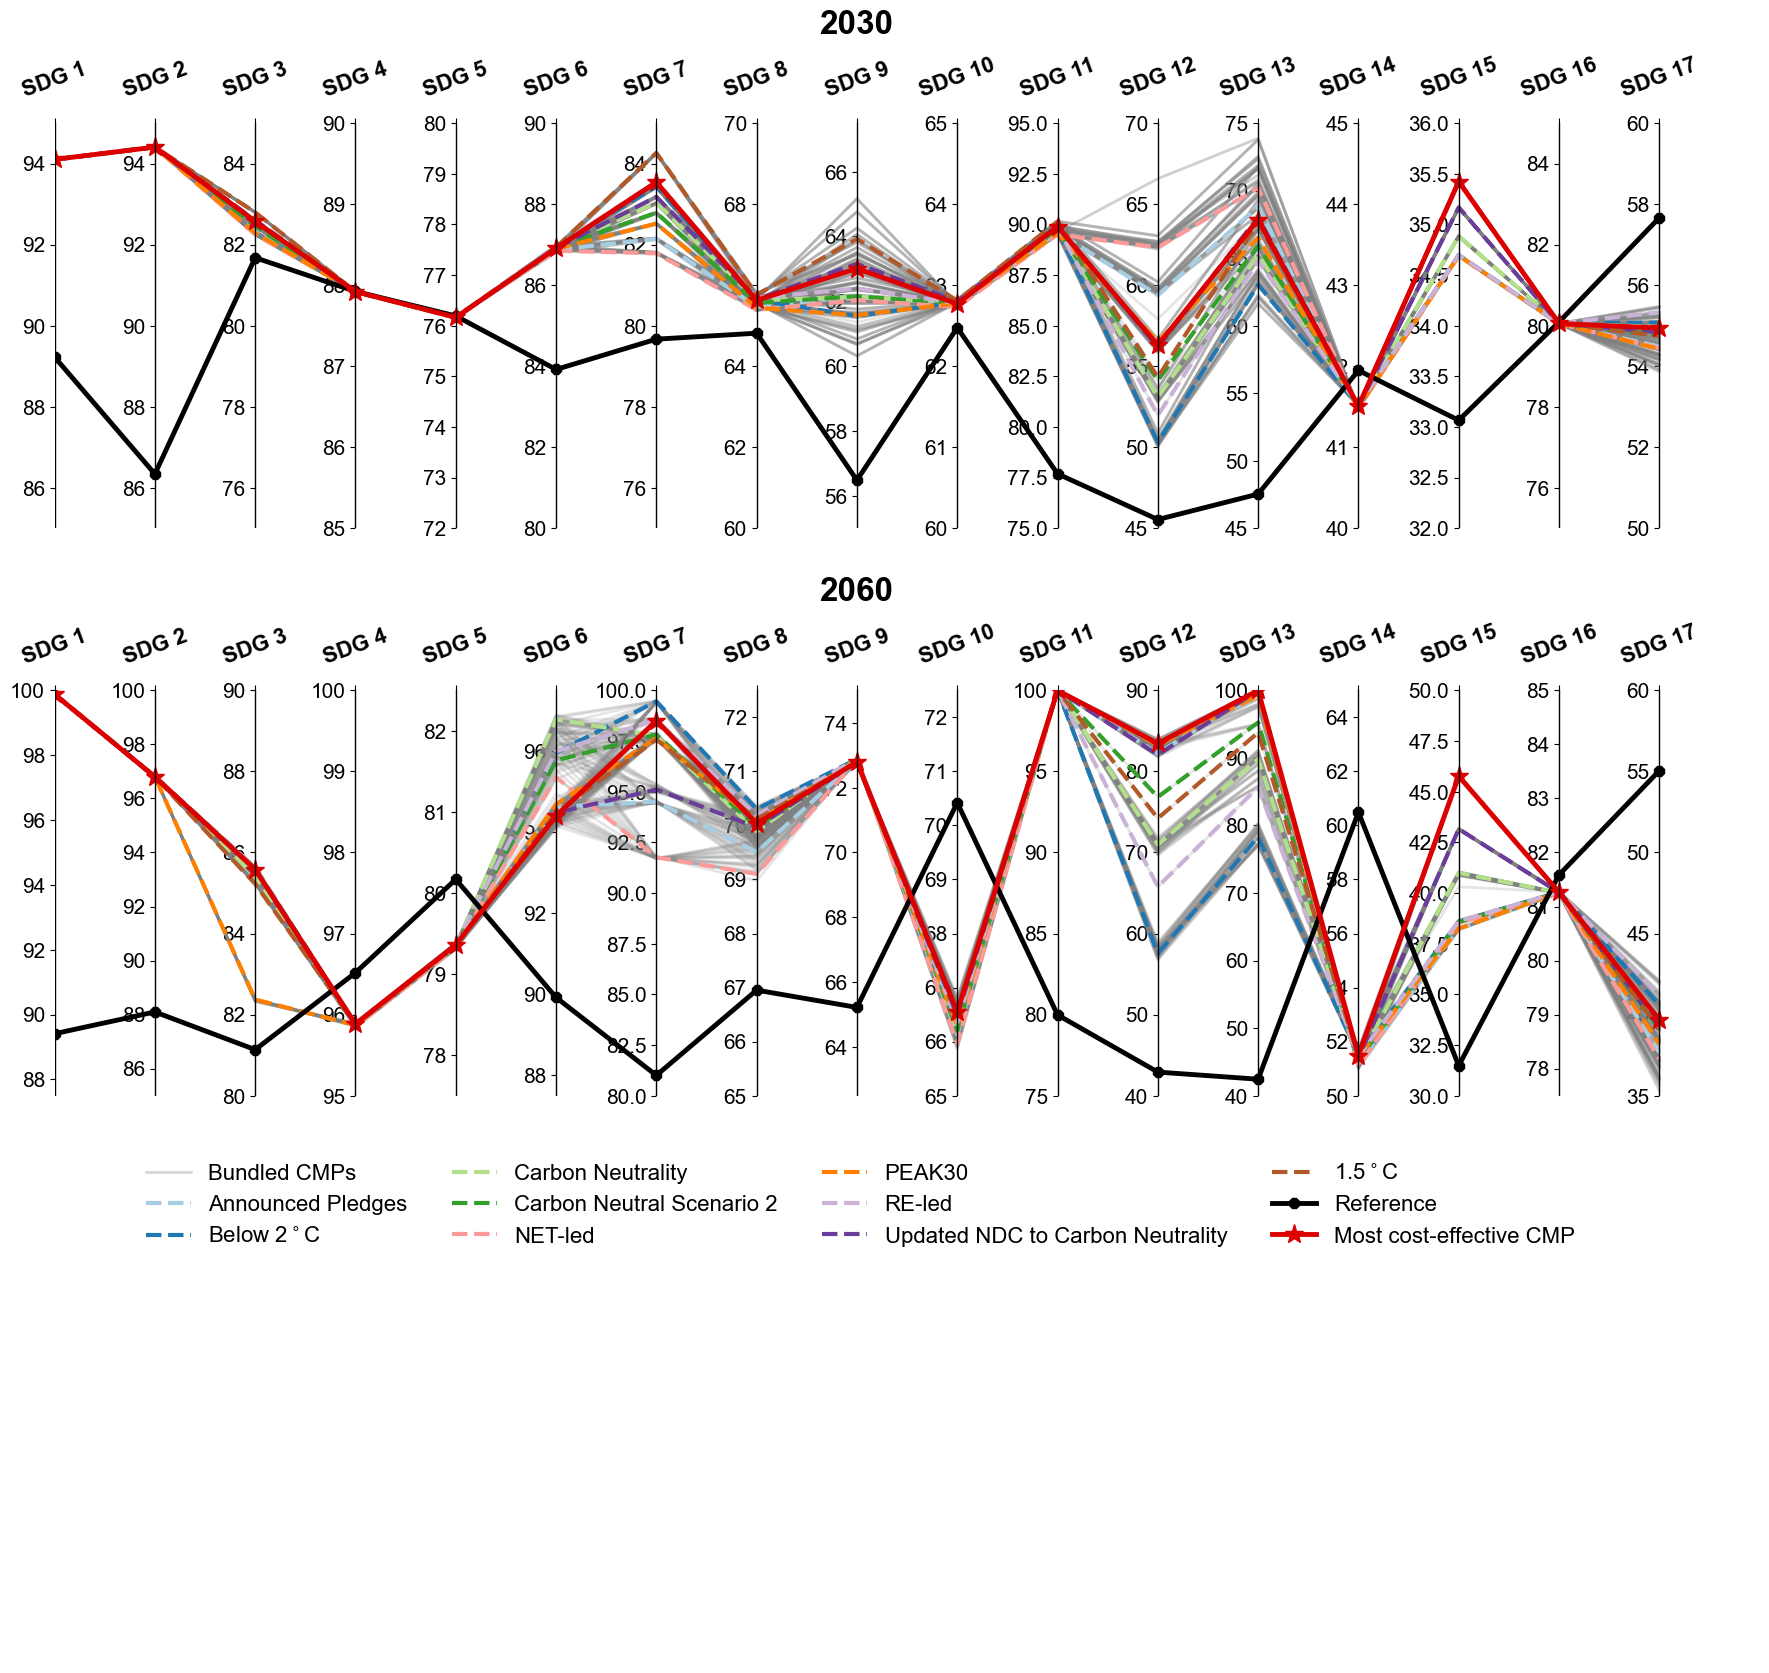

In [12]:
fig = plt.figure(figsize=(22,20))
plt.rc('font',family='Arial') 
plt.axis('off')
plt.subplots_adjust(hspace=0.4) 
for year, local_, title_ in zip([2030,2060],[311,312],['2030','2060']):
    data_policy = sdgs[sdgs['Year']==year]
    loc_list=list(data_policy)[1:]
    value_Ref=[]
    value_eff=[]
    value_AP=[]
    value_B2=[]
    value_CN_1=[]
    value_CNS2=[]
    value_NL=[]
    value_PE=[]
    value_RL=[]
    value_UNCN=[]
    value_Ts=[]
    for item in loc_list:
        if 'Reference' in item:
            value_Ref_test=float(data_policy[item]) * 100
            value_Ref.append(value_Ref_test)
        if 'RL_LU(1650)_CCS(2000)' in item:
            value_eff_test=float(data_policy[item]) * 100
            value_eff.append(value_eff_test)
        if 'AP_all' in item:
            value_AP_test=float(data_policy[item]) * 100
            value_AP.append(value_AP_test)
        if 'B2_all' in item:
            value_B2_test=float(data_policy[item]) * 100
            value_B2.append(value_B2_test)
        if 'CN_all' in item:
            value_CN_test=float(data_policy[item]) * 100
            value_CN_1.append(value_CN_test)
        value_CN=value_CN_1[0:34:2]
        if 'CNS2_all' in item:
            value_CNS2_test=float(data_policy[item]) * 100
            value_CNS2.append(value_CNS2_test)
        if 'NL_all' in item:
            value_NL_test=float(data_policy[item]) * 100
            value_NL.append(value_NL_test)
        if 'PE_all' in item:
            value_PE_test=float(data_policy[item]) * 100
            value_PE.append(value_PE_test)
        if 'RL_all' in item:
            value_RL_test=float(data_policy[item]) * 100
            value_RL.append(value_RL_test)
        if 'UNCN_all' in item:
            value_UNCN_test=float(data_policy[item]) * 100
            value_UNCN.append(value_UNCN_test)
        if 'Ts_all' in item:
            value_Ts_test=float(data_policy[item]) * 100
            value_Ts.append(value_Ts_test)
    list_plot=[]
    list_plot.append(value_AP)
    list_plot.append(value_B2)
    list_plot.append(value_CN)
    list_plot.append(value_CNS2)
    list_plot.append(value_NL)
    list_plot.append(value_PE)
    list_plot.append(value_RL)
    list_plot.append(value_UNCN)
    list_plot.append(value_Ts)  
    tagert_list_new=[]
    separator=':'
    for item in loc_list[0:191]:
        if 'Reference' in item:
            continue
        tagert_list_new.append(item.split(separator, 1)[0])
    value_all=[]
    for target in tagert_list_new:
        value_plot=[]
        for i in list(range(1,18,1)):
            value_plot_test = float(data_policy[f'{target}: SDi.sdg performance[sdg {i}]']) * 100
            value_plot.append(value_plot_test)
        value_all.append(value_plot)

    ymins, ymaxs = limit_dict[year]
    host = host_subplot(local_)
    axes=[host]+[host.twinx() for i in range(SDG_num-1)]

    for i, ax in enumerate(axes):
        ax.set_ylim(ymins[i], ymaxs[i])
        ax.set_frame_on(False)
        if ax != host:
            ax.yaxis.set_ticks_position('left')
            ax.spines["left"].set_position(("axes", i / (SDG_num)))
            ax.spines['right'].set_visible(False)
        ax.tick_params(labelsize=15)

    path_1=value_all[2].copy()
    for i in range(1,SDG_num):
        path_1[i] = (path_1[i]-ymins[i])/(ymaxs[i]-ymins[i])*(ymaxs[0]-ymins[0])+ymins[0]
    host.plot(range(SDG_num), path_1, lw=2,ls='-', alpha=0.3,color='grey',label='Bundled CMPs')
    for path_list in value_all:
        for i in range(1,SDG_num):
            path_list[i] = (path_list[i]-ymins[i])/(ymaxs[i]-ymins[i])*(ymaxs[0]-ymins[0])+ymins[0]
        host.plot(range(SDG_num), path_list, lw=2,ls='-', alpha=0.2,color='grey',) # color='black',label=target

    for key_, name_,color_ in zip(list_plot, name_list,color_list):
        path_list = key_
        for i in range(1,SDG_num):
            path_list[i] = (path_list[i]-ymins[i])/(ymaxs[i]-ymins[i])*(ymaxs[0]-ymins[0])+ymins[0]
        host.plot(range(SDG_num), path_list, lw=3,ls='--', alpha=1,label=name_,color=color_) 

    for i in range(1,SDG_num):
        value_Ref[i] = (value_Ref[i]-ymins[i])/(ymaxs[i]-ymins[i])*(ymaxs[0]-ymins[0])+ymins[0]
    host.plot(range(SDG_num), value_Ref, lw=3.5,ls='-', alpha=1,marker='8', markersize =8,color='black',label='Reference') # color='black'

    for i in range(1,SDG_num):
        value_eff[i] = (value_eff[i]-ymins[i])/(ymaxs[i]-ymins[i])*(ymaxs[0]-ymins[0])+ymins[0]
    host.plot(range(SDG_num), value_eff, lw=3.5,ls='-', alpha=1,marker='*', markersize =14,color='#DC0000',label='Cost-effective CMP') # color='black'


    host.set_xlim(0, SDG_num)
    host.set_xticks(range(SDG_num))
    host.set_xticklabels(ynames, y=1.02,fontsize=16, rotation=20,fontweight='semibold')
    host.tick_params(axis='x', which='major', pad=7)
    host.spines['right'].set_visible(False)
    host.xaxis.tick_top()
    host.set_title(title_,x=0.47,y=1.2,fontsize=24,fontweight='bold')
    for i in range(SDG_num):
        axes[i].add_line(plt.Line2D([i,i],[ymins[i], ymaxs[i]],c='k',linewidth=1))

plt.legend(loc='center left',  frameon=False, bbox_to_anchor=(0.042,-0.3, .1, 0.06), ncol=4, fontsize=16)


In [44]:
fig.savefig('bundled_sdgs.png',dpi=300,bbox_inches='tight')